In [1]:
!pip install japanize-matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline
import statsmodels

In [3]:
# データの読み込み
df = pd.read_excel('cycle.xlsx')
df

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972


In [4]:
df_dt = df.set_index(df['dteday'])
df_dt

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
dteday,,,,,,,,,,,,,,
2011-01-01,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-09,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498
2012-06-10,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598
2012-06-11,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664


## 天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデル作成

各列の意味
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



### 基礎集計

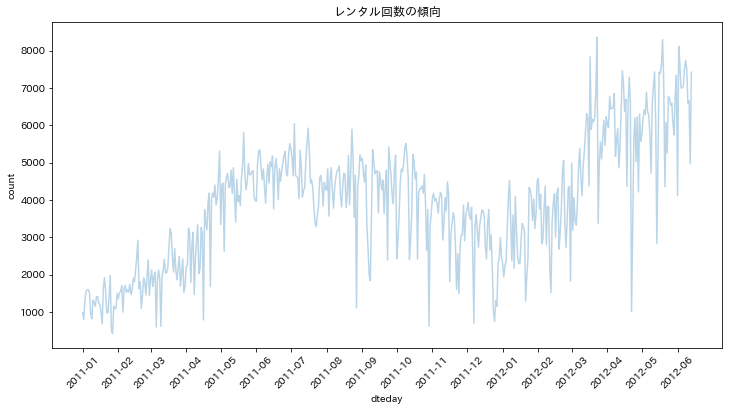

In [5]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, title='レンタル回数の傾向')

# 折れ線グラフ
sns.lineplot(x='dteday', y='count', data=df, ax=ax, alpha=0.3)

# x軸のメモリの設定
ax.set_xticks(np.arange('2011-01', '2012-07', dtype='datetime64[M]'))
ax.set_xticklabels(np.arange('2011-01', '2012-07', dtype='datetime64[M]'), rotation=45)
fig.show()

In [6]:
# 移動平均の値を算出
# ある1日を基準として、その日から10日前までの平均を取る
df['sma'] = df['count'].rolling(10).mean()
df

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,sma
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985,NaN
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801,NaN
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349,NaN
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562,NaN
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498,7100.8
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598,7026.8
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664,7280.5
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972,6965.7


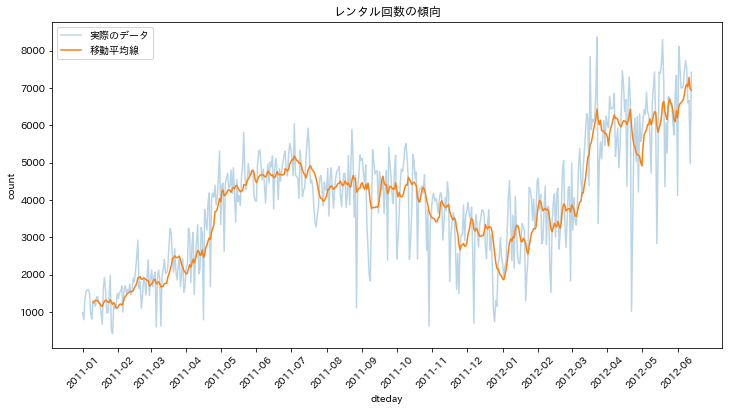

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, title='レンタル回数の傾向')

# 折れ線グラフの描画
sns.lineplot(x='dteday', y='count', data=df, ax=ax, alpha=0.3, label='実際のデータ')
sns.lineplot(x='dteday', y='sma', data=df, ax=ax, label='移動平均線')

ax.set_xticks(np.arange('2011-01', '2012-07', dtype='datetime64[M]'))
ax.set_xticklabels(np.arange('2011-01', '2012-07', dtype='datetime64[M]'), rotation=45)

ax.legend()

fig.show()

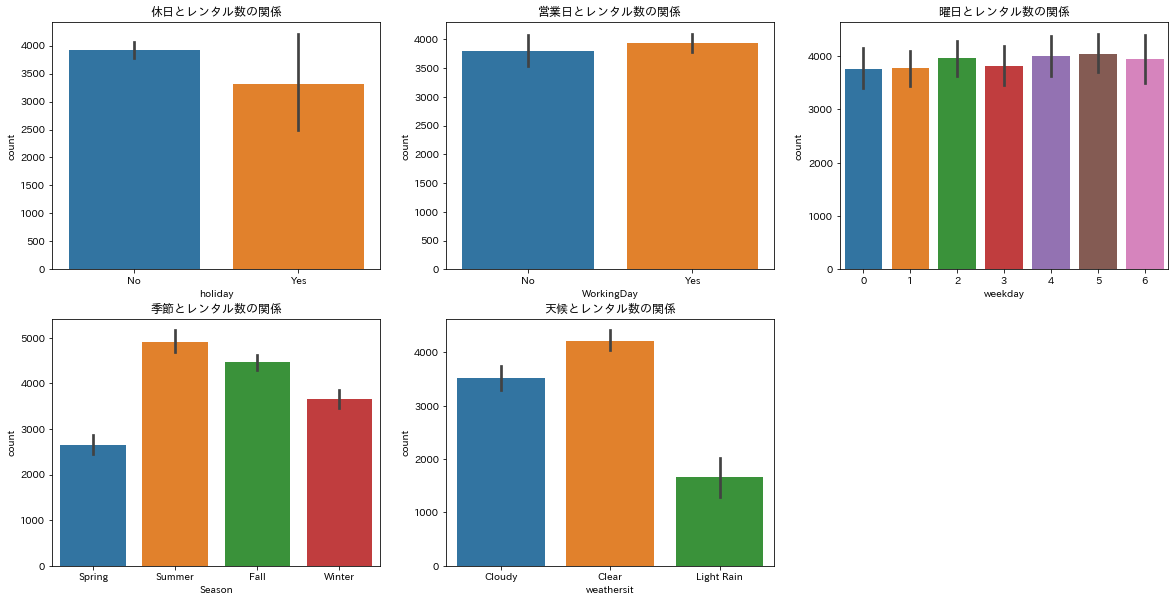

In [8]:
# カテゴリー変数とレンタル数の関係
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2, 3, 1, title='休日とレンタル数の関係')
ax2 = fig.add_subplot(2, 3, 2, title='営業日とレンタル数の関係')
ax3 = fig.add_subplot(2, 3, 3, title='曜日とレンタル数の関係')
ax4 = fig.add_subplot(2, 3, 4, title='季節とレンタル数の関係')
ax5 = fig.add_subplot(2, 3, 5, title='天候とレンタル数の関係')

# それぞれのカテゴリー変数とレンタル数の関係を描画
sns.barplot(data=df, x='holiday', y='count', ax=ax1)
sns.barplot(data=df, x='WorkingDay', y='count', ax=ax2)
sns.barplot(data=df, x='weekday', y='count', ax=ax3)
sns.barplot(data=df, x='Season', y='count', ax=ax4)
sns.barplot(data=df, x='weathersit', y='count', ax=ax5)

fig.show()

In [9]:
# 曜日、レンタル数が中央値より多いかどうか
crossed_weekday = pd.crosstab([df['weekday']], [df['count'] > df['count'].median()])
crossed_weekday

count,False,True
weekday,,
0,42,34
1,40,36
2,31,45
3,38,38
4,39,36
5,38,37
6,37,39


In [10]:
# 縦軸　季節、横軸　レンタル数が中央値より多いかどうかを
crossed_season = pd.crosstab([df['Season']], [df['count'] > df['count'].median()])
crossed_season

count,False,True
Season,,
Fall,21,73
Spring,137,33
Summer,49,128
Winter,58,31


In [11]:
from scipy import stats

In [12]:
# 季節を用いたクロス表においてカイ2乗検定
x2, p, dof, expected = stats.chi2_contingency(crossed_season)

print("確率は %(p)s" %locals() )

if p < 0.05:
    print("有意な差がある")
else:
    print("有意な差がない")


確率は 2.980246567665192e-29
有意な差がある


In [13]:
# 説明変数についてクロス集計の実施
crossed_holiday = pd.crosstab([df['holiday']], [df['count'] > df['count'].median()])
crossed_workingday = pd.crosstab([df['WorkingDay']], [df['count'] > df['count'].median()])
crossed_weekday = pd.crosstab([df['weekday']], [df['count'] > df['count'].median()])
crossed_season = pd.crosstab([df['Season']], [df['count'] > df['count'].median()])
crossed_weathersit = pd.crosstab([df['weathersit']], [df['count'] > df['count'].median()])

# クロス集計に対してカイ2乗検定の実施
chi_holiday = stats.chi2_contingency(crossed_holiday)
chi_workingday= stats.chi2_contingency(crossed_workingday)
chi_weekday = stats.chi2_contingency(crossed_weekday)
chi_season = stats.chi2_contingency(crossed_season)
chi_weathersit = stats.chi2_contingency(crossed_weathersit)

In [14]:
# カイ2乗検定の結果を表したデータフレーム
df_chi = pd.DataFrame([chi_holiday,
                       chi_workingday,
                       chi_weekday,
                       chi_season,
                       chi_weathersit],
                      index=['休日', '営業日', '曜日', '季節', '天候'],
                      columns=['カイ2乗値', '確率', '自由度', '期待値'])

df_chi

,カイ2乗値,確率,自由度,期待値
休日,1.097735,2.947638e-01,1,"[[257.5, 257.5], [7.5, 7.5]]"
営業日,0.874284,3.497719e-01,1,"[[83.5, 83.5], [181.5, 181.5]]"
曜日,3.817544,7.013517e-01,6,"[[38.0, 38.0], [38.0, 38.0], [38.0, 38.0], [38..."
季節,135.840385,2.980247e-29,3,"[[47.0, 47.0], [85.0, 85.0], [88.5, 88.5], [44..."
天候,42.487688,5.941770e-10,2,"[[166.5, 166.5], [90.0, 90.0], [8.5, 8.5]]"


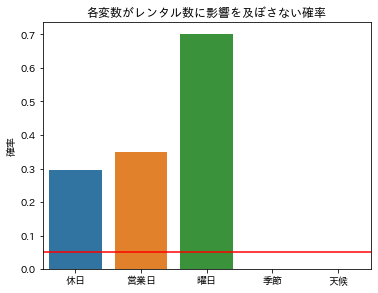

In [15]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 3, 1, title='各変数がレンタル数に影響を及ぼさない確率')

sns.barplot(data=df_chi, x=df_chi.index, y='確率')

# 確率が0.05である基準の線
ax1.axhline(0.05, color='red')

fig.show()

In [16]:
# 相関係数の表示
corr_mat = df.corr()
corr_mat

,year,mnth,weekday,temp,atemp,hum,windspeed,count,sma
year,1.000000,-0.452695,-0.010314,-0.115876,-0.110701,-0.169970,0.096382,0.443076,0.460195
mnth,-0.452695,1.000000,0.015301,0.371502,0.378604,0.254620,-0.225781,0.174178,0.219736
weekday,-0.010314,0.015301,1.000000,-0.014238,-0.014323,-0.033017,0.003080,0.046945,0.004697
temp,-0.115876,0.371502,-0.014238,1.000000,0.996399,0.176356,-0.131793,0.632053,0.665035
atemp,-0.110701,0.378604,-0.014323,0.996399,1.000000,0.186222,-0.156274,0.641070,0.668772
hum,-0.169970,0.254620,-0.033017,0.176356,0.186222,1.000000,-0.270100,-0.104621,0.048695
windspeed,0.096382,-0.225781,0.003080,-0.131793,-0.156274,-0.270100,1.000000,-0.182528,-0.108690
count,0.443076,0.174178,0.046945,0.632053,0.641070,-0.104621,-0.182528,1.000000,0.868005
sma,0.460195,0.219736,0.004697,0.665035,0.668772,0.048695,-0.108690,0.868005,1.000000


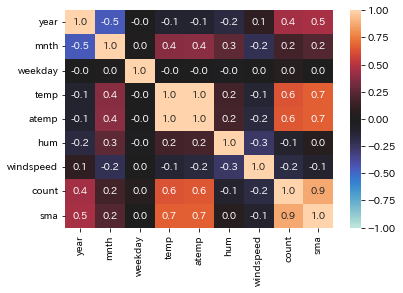

In [17]:
# ヒートマップの描画
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values,
           )
plt.show()

In [18]:
from mpl_toolkits.mplot3d import Axes3D

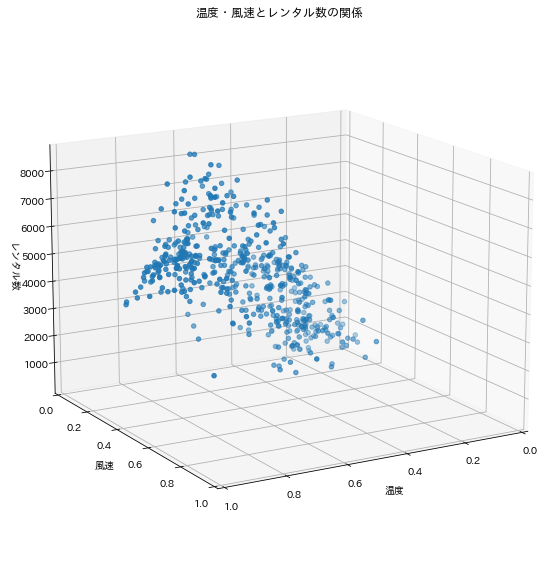

In [19]:
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot(111, projection='3d', title='温度・風速とレンタル数の関係')

# temp, windspeedに注目
x = df.loc[:, 'temp'] # temp
y = df.loc[:, 'windspeed'] # windspeed
z = df.loc[:, 'count'] # count

ax.set_xlabel('温度')
ax.set_ylabel('風速')
ax.set_zlabel('レンタル数')

ax.scatter(x, y, z)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.view_init(15, 60)

fig.show()

## 前処理

In [20]:
# 2011年と2012年のデータそれぞれに分割
df_2011 = df[df['year'] == 2011].copy()
df_2012 = df[df['year'] == 2012].copy()

In [21]:
df_2011

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,sma
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985,NaN
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801,NaN
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349,NaN
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562,NaN
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,ID-361,Spring,2011,2011-12-27,12,No,2,Yes,Cloudy,0.325000,0.327633,0.762500,0.188450,1162,2176.5
361,ID-362,Spring,2011,2011-12-28,12,No,3,Yes,Clear,0.299130,0.279974,0.503913,0.293961,2302,2163.6
362,ID-363,Spring,2011,2011-12-29,12,No,4,Yes,Clear,0.248333,0.263892,0.574167,0.119412,2423,2065.6
363,ID-364,Spring,2011,2011-12-30,12,No,5,Yes,Clear,0.311667,0.318812,0.636667,0.134337,2999,1990.5


In [22]:
df_2012

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count,sma
365,ID-366,Spring,2012,2012-01-01,1,No,0,No,Clear,0.370000,0.375621,0.692500,0.192167,2294,1895.6
366,ID-367,Spring,2012,2012-01-02,1,Yes,1,No,Clear,0.273043,0.252304,0.381304,0.329665,1951,1869.8
367,ID-368,Spring,2012,2012-01-03,1,No,2,Yes,Clear,0.150000,0.126275,0.441250,0.365671,2236,1992.3
368,ID-369,Spring,2012,2012-01-04,1,No,3,Yes,Cloudy,0.107500,0.119337,0.414583,0.184700,2368,2153.7
369,ID-370,Spring,2012,2012-01-05,1,No,4,Yes,Clear,0.265833,0.278412,0.524167,0.129987,3272,2349.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,ID-526,Summer,2012,2012-06-09,6,No,6,No,Clear,0.710833,0.648367,0.437083,0.144287,7498,7100.8
526,ID-527,Summer,2012,2012-06-10,6,No,0,No,Clear,0.726667,0.663517,0.538333,0.133721,6598,7026.8
527,ID-528,Summer,2012,2012-06-11,6,No,1,Yes,Cloudy,0.720833,0.659721,0.587917,0.207713,6664,7280.5
528,ID-529,Summer,2012,2012-06-12,6,No,2,Yes,Cloudy,0.653333,0.597875,0.833333,0.214546,4972,6965.7


In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
encoder = OneHotEncoder(sparse=False)

# データの読み込み
encoder.fit(df_2011.loc[:, ['Season', 'holiday', 'WorkingDay', 'weathersit']])

# ワンホットエンコーディング(2011年)
onehot_feature = encoder.transform(df_2011.loc[:, ['Season', 'holiday', 'WorkingDay', 'weathersit']])

pd.DataFrame(onehot_feature, index=df_2011.index, columns=encoder.get_feature_names_out())

,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
360,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
361,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
362,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
363,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
# データフレームにする
df_feature_2011 = pd.DataFrame(onehot_feature, columns=encoder.get_feature_names_out())

# 2011年のデータフレームと結合
df_2011_feature = pd.merge(df_2011, df_feature_2011, left_index=True, right_index=True)

# 学習に用いない特徴量を削除
df_2011_feature = df_2011_feature.drop(columns=['sma', 'Instant', 'Season', 'year', 'dteday', 'holiday', 'WorkingDay', 'weathersit', 'count'])

df_2011_feature

,mnth,weekday,temp,atemp,hum,windspeed,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
0,1,6,0.344167,0.363625,0.805833,0.160446,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,0,0.363478,0.353739,0.696087,0.248539,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,1,0.196364,0.189405,0.437273,0.248309,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1,2,0.200000,0.212122,0.590435,0.160296,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1,3,0.226957,0.229270,0.436957,0.186900,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12,2,0.325000,0.327633,0.762500,0.188450,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
361,12,3,0.299130,0.279974,0.503913,0.293961,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
362,12,4,0.248333,0.263892,0.574167,0.119412,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
363,12,5,0.311667,0.318812,0.636667,0.134337,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [26]:
# 2012年の質的変数をワンホットエンコーディングしたデータフレームの生成
df_feature_2012 = pd.DataFrame(encoder.transform(df_2012.loc[:, ['Season', 'holiday', 'WorkingDay', 'weathersit']]), index=df_2012.index, columns=encoder.get_feature_names_out())

# 2012年のデータと結合
df_2012_feature = pd.merge(df_2012, df_feature_2012, left_index=True, right_index=True)

# 特徴量に用いない列の削除
df_2012_feature = df_2012_feature.drop(columns=['sma', 'Instant', 'Season', 'year', 'dteday', 'holiday', 'WorkingDay', 'weathersit', 'count'])

df_2012_feature

,mnth,weekday,temp,atemp,hum,windspeed,Season_Fall,Season_Spring,Season_Summer,Season_Winter,holiday_No,holiday_Yes,WorkingDay_No,WorkingDay_Yes,weathersit_Clear,weathersit_Cloudy,weathersit_Light Rain
365,1,0,0.370000,0.375621,0.692500,0.192167,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
366,1,1,0.273043,0.252304,0.381304,0.329665,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
367,1,2,0.150000,0.126275,0.441250,0.365671,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
368,1,3,0.107500,0.119337,0.414583,0.184700,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
369,1,4,0.265833,0.278412,0.524167,0.129987,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,6,6,0.710833,0.648367,0.437083,0.144287,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
526,6,0,0.726667,0.663517,0.538333,0.133721,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
527,6,1,0.720833,0.659721,0.587917,0.207713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
528,6,2,0.653333,0.597875,0.833333,0.214546,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### 学習

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [28]:
X_train, y_train, X_test, y_test = df_2011_feature.values, df_2011['count'].values, df_2012_feature.values, df_2012['count'].values

In [29]:
# GBDT
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
# 回帰用モデルの構築
gbdt_reg = GradientBoostingRegressor(random_state=0)

# 学習データを用いた学習
gbdt_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [31]:
# 学習したモデルを予測
y_pred_1 = gbdt_reg.predict(X_test)
y_pred_1

array([1282.18960683,  922.5175872 , 1258.96511082, 1459.60922681,
       1675.40324618, 1612.36822038, 1767.50736701, 1691.91889939,
       1265.53168898, 1534.12710506, 1431.90459003, 1551.60811193,
       1397.70460615, 1226.40610617, 1102.25301994,  818.80783889,
       1263.11302662, 1493.42001247, 1420.73196858, 1531.10335214,
        836.04640626,  905.12994299, 1139.66973409, 1514.14905212,
       1492.63519084, 1520.98090615, 1656.33583065, 1530.32143839,
       1509.26333855, 1616.49634818, 1823.02495667, 3603.40938243,
       1866.8066347 , 1900.56127627, 1553.92121134, 1282.91180157,
       1782.52092451, 1996.90562398, 1612.19955997, 1752.64436136,
       1879.02419024,  910.92462745, 1096.66074564, 1659.11272592,
       1855.49783193, 1835.57766316, 1707.95195157, 1894.41474687,
       1859.17426673, 1592.64575895, 1171.19466816, 1768.06032329,
       2004.26170136, 2574.35064889, 2107.29796734, 1427.12512326,
       1751.81436896, 1945.97252389, 1999.99172678, 1603.51326

## 評価

In [32]:
df_pred = pd.DataFrame({'count':y_test,'count_pred':y_pred_1})
df_pred

,count,count_pred
0,2294,1282.189607
1,1951,922.517587
2,2236,1258.965111
3,2368,1459.609227
4,3272,1675.403246
...,...,...
160,7498,5291.093594
161,6598,4781.687754
162,6664,4603.991485
163,4972,4153.298250


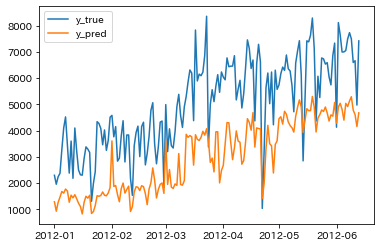

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 実際の観測値
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_test, label='y_true')
# 予測した値
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_pred_1, label='y_pred')

ax.legend()

fig.show()

In [34]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

In [35]:
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred_1))

MAPE:  0.41494868088744075


### 精度向上

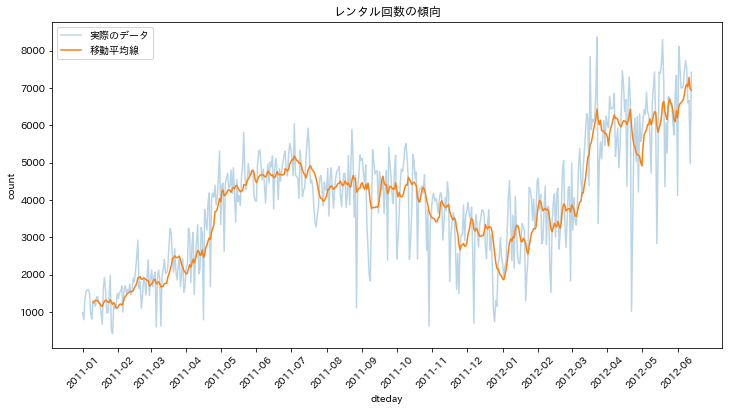

In [36]:
# 集計結果の確認
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, title='レンタル回数の傾向')

# 折れ線グラフ
sns.lineplot(x='dteday', y='count', data=df, ax=ax, alpha=0.3, label='実際のデータ')
sns.lineplot(x='dteday', y='sma', data=df, ax=ax, label='移動平均線')

ax.set_xticks(np.arange('2011-01', '2012-07', dtype='datetime64[M]'))
ax.set_xticklabels(np.arange('2011-01', '2012-07', dtype='datetime64[M]'), rotation=45)
ax.legend()
fig.show()

In [37]:
from statsmodels.tsa.seasonal import STL

In [38]:
# モデル生成
stl = STL(pd.Series(df_dt['count']), period=365, robust=True)
# STL分解
stl_series = stl.fit()

<Figure size 1584x864 with 0 Axes>

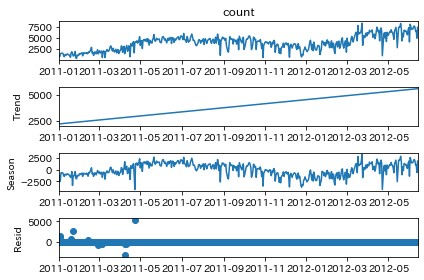

In [39]:
plt.figure(figsize=(22, 12))
# STL分解した結果
# Trend: 全体的な傾向, Season: 季節的な周期, Resid: 残差
stl_series.plot()
plt.show()

In [40]:
# 季節性のみを学習
X_train, y_train, X_test, y_test = df_2011_feature.values, stl_series.seasonal[:365], df_2012_feature.values, df_2012['count'].values

# 回帰用モデル
gbdt_reg = GradientBoostingRegressor(random_state=0)

# 学習データを用いた学習
gbdt_reg.fit(X_train, y_train)

# 学習したモデルを予測
y_pred_season = gbdt_reg.predict(X_test)
y_pred_season

array([-1689.80324451, -1187.30721188, -1561.46192099,  -965.28451225,
        -844.74496667,  -924.33434319,  -756.49017941,  -907.80833288,
       -1283.90677013, -1371.7843794 , -1202.34415669, -1580.12098039,
       -1492.61496356, -1004.98980093, -1350.15766317, -1588.46104218,
       -2412.97478613, -1430.22666429, -1010.31634664,  -921.64828276,
       -1384.3578739 , -1521.95235082, -1869.16464981, -1032.37152428,
       -1454.60972599, -1134.7613262 , -1832.39802008,  -947.62341192,
       -1309.14883877, -1027.87327799, -1105.6690059 ,   926.73389233,
        -609.45425106,  -554.58511407,  -650.23797135,  -992.65496874,
        -878.31457539,  -534.4072835 ,  -903.25555345,  -782.38130234,
        -739.18901088, -1436.21299299, -1436.24949278,  -911.0353929 ,
        -635.40676475,  -564.35014392,  -624.45333231,  -518.66098761,
        -507.97078177, -1064.42794899, -1095.84384288,  -763.56690851,
        -540.05058028,  -274.07773402,  -755.15277656, -1279.61159757,
      

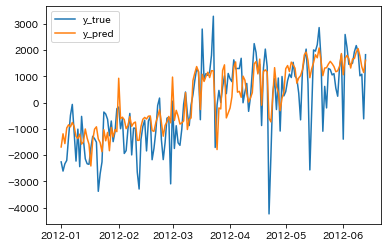

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 実際の季節成分の観測値
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), stl_series.seasonal[365:], label='y_true')
# 予測した値
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_pred_season, label='y_pred')
ax.legend()
fig.show()

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# 線形回帰モデル
linear = LinearRegression()
# 学習データのトレンド成分を用いた学習()
linear.fit([[i] for i in range(365)], stl_series.trend[:365].values)

LinearRegression()

In [44]:
# トレンド成分に対応する365~529日目に対応する数値を季節性の予測結果に合算
y_pred_sum = y_pred_season + linear.predict([[i] for i in range(365, 530)])

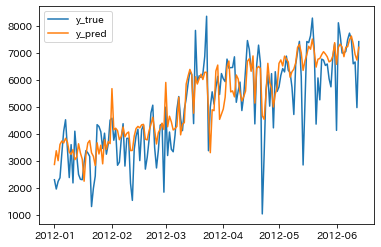

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 実際の観測地
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_test, label='y_true')
# 予測した値
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_pred_sum, label='y_pred')
ax.legend()
fig.show()

In [46]:
print('MAPE: ', mean_absolute_percentage_error(y_test,  y_pred_sum))

MAPE:  0.1949334542931474


### ハイパーパラメータチューニング

In [47]:
# optuna
!pip install optuna

In [48]:
import optuna
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
from functools import partial
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
def objective(X, y, trial):
    # パラメータの範囲
    params = {'max_depth': trial.suggest_int('max_depth', 2, 10), 'n_estimators': trial.suggest_int('n_estimators', 100, 500, 50)}
    # パラメータの適応
    gbdt = GradientBoostingRegressor(**params, random_state=0)
    # 改善したいスコアとして、MAPEを設定
    score = make_scorer(mean_absolute_percentage_error)
    # 交差検証の分割数設定
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    # 交差検証の実行
    scores = cross_validate(gbdt, scoring=score, X=X, y=y, cv=kf)
    return scores['test_score'].mean()

def main():
    # 学習データの設定
    X, y = X_train, y_train
    # 目的関数にデータを適用する
    f = partial(objective, X, y)
    # 最適化のセッションを作る
    study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=42))
    # 50 回試行する
    study.optimize(f, n_trials=50)
    # 最適化したパラメータを出力する
    print('params:', study.best_params)


main()

[I 2022-12-12 03:45:02,146] A new study created in memory with name: no-name-55be9bbb-6afc-4ba9-9c73-f670399a2f40
[I 2022-12-12 03:45:04,108] Trial 0 finished with value: 1.6808457928435214 and parameters: {'max_depth': 5, 'n_estimators': 500}. Best is trial 0 with value: 1.6808457928435214.
[I 2022-12-12 03:45:05,971] Trial 1 finished with value: 1.4144578725730148 and parameters: {'max_depth': 8, 'n_estimators': 350}. Best is trial 1 with value: 1.4144578725730148.
[I 2022-12-12 03:45:06,428] Trial 2 finished with value: 1.6567670441855515 and parameters: {'max_depth': 3, 'n_estimators': 150}. Best is trial 1 with value: 1.4144578725730148.
[I 2022-12-12 03:45:07,379] Trial 3 finished with value: 1.819563850356099 and parameters: {'max_depth': 2, 'n_estimators': 450}. Best is trial 1 with value: 1.4144578725730148.
[I 2022-12-12 03:45:09,300] Trial 4 finished with value: 1.387709263238397 and parameters: {'max_depth': 7, 'n_estimators': 400}. Best is trial 4 with value: 1.38770926323

params: {'max_depth': 7, 'n_estimators': 250}


In [50]:
# 再学習
X_train, y_train, X_test, y_test = df_2011_feature.values, stl_series.seasonal[:365], df_2012_feature.values, df_2012['count'].values

# 回帰用モデル
gbdt_reg = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=0)

# 学習データを学習
gbdt_reg.fit(X_train, y_train)

# 学習したモデルを予測
y_pred_season_2 = gbdt_reg.predict(X_test)

# トレンド成分に対応する365~529日目に対応する数値を季節性の予測結果に合計する
y_pred_sum_2 = y_pred_season_2 + linear.predict([[i] for i in range(365, 530)])

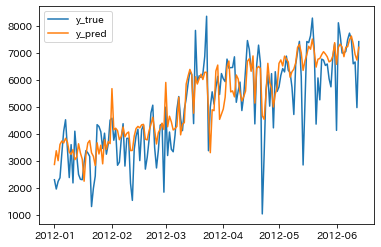

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)

# 観測地
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_test, label='y_true')
# 予測した値
ax.plot(np.arange('2012-01-01', '2012-06-14', dtype='datetime64[D]'), y_pred_sum_2, label='y_pred')
ax.legend()
fig.show()

In [52]:
print('MAPE: ', mean_absolute_percentage_error(y_test,  y_pred_sum))

MAPE:  0.1949334542931474


### モデルの解釈

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
# 重要度の算出 >>> ランダムフォレスト
# ランダムフォレストによる回帰モデル
rf = RandomForestRegressor(random_state=0)
# 学習
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [55]:
# 重要度の表示
rf.feature_importances_

array([0.0648561 , 0.0193815 , 0.09916752, 0.54238729, 0.13041192,
       0.04654759, 0.00088935, 0.01327652, 0.01555041, 0.01098227,
       0.00365478, 0.00201877, 0.0037546 , 0.00374876, 0.00534518,
       0.00886575, 0.02916169])

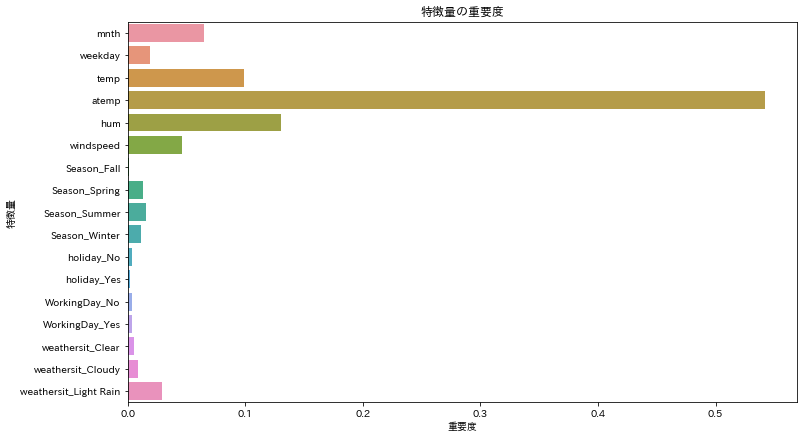

In [56]:
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, title='特徴量の重要度')

sns.barplot(y=df_2011_feature.columns, x=rf.feature_importances_, ax=ax)

ax.set_ylabel('特徴量')
ax.set_xlabel('重要度')

fig.show()

In [57]:
# boruta
!pip install boruta

In [58]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

In [59]:
# ランダムフォレストを用いた回帰モデル
rf = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=0)
# モデルの生成
feat_selector = BorutaPy(rf, n_estimators='auto', two_step=False, verbose=2, random_state=0)
# 特徴量を選抜
feat_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	2
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	11
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	11
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	11
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	11
I

BorutaPy(estimator=RandomForestRegressor(max_depth=7, n_estimators=49,
                                         random_state=RandomState(MT19937) at 0x7F5BDBAF5140),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F5BDBAF5140, two_step=False,
         verbose=2)

In [60]:
# 結果を2値で表示
print(feat_selector.support_)
# 必要な特徴量のみ表示
print(df_2011_feature.columns[feat_selector.support_])

[ True False  True  True  True  True False False False False False False
 False False False False False]
Index(['mnth', 'temp', 'atemp', 'hum', 'windspeed'], dtype='object')


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [62]:
# 決定木を用いた回帰モデルの生成・学習
clf = DecisionTreeRegressor(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

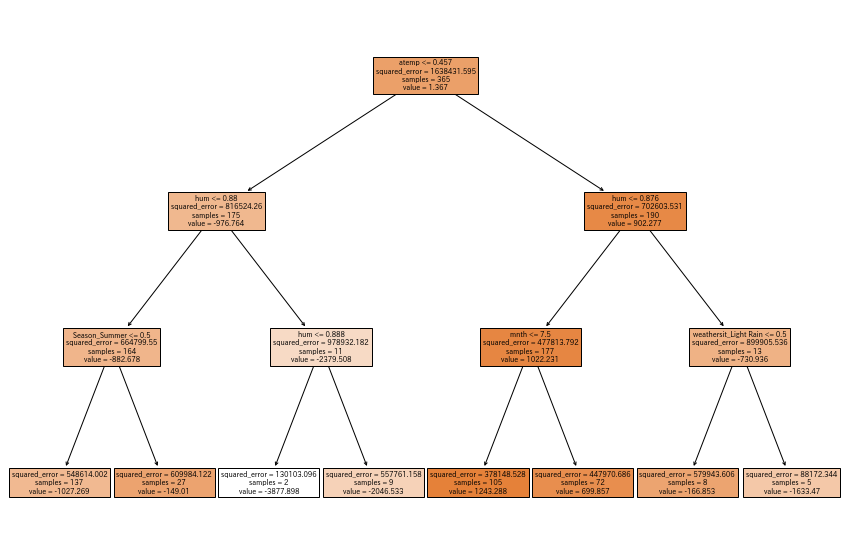

In [63]:
# 決定木による可視化
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=df_2011_feature.columns, filled=True)
plt.show()

### 6.2 結果の解釈

In [64]:
# SHAP
!pip install shap

In [65]:
# shapを利用するためのモジュール
import shap

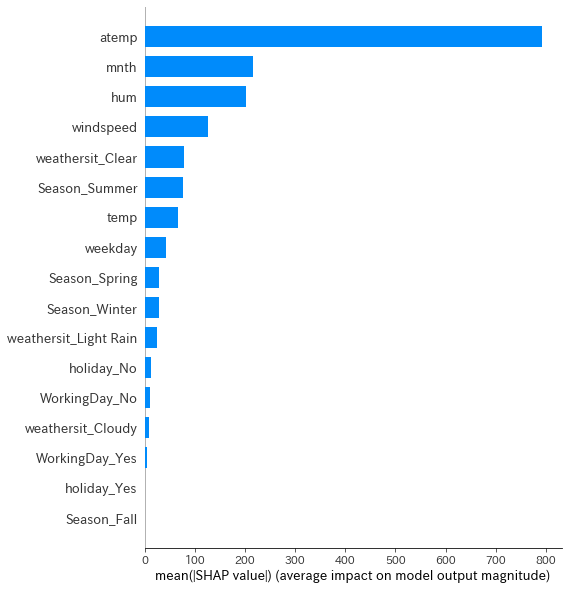

In [66]:
shap.initjs()
# 決定木系列のモデルを利用したshap値算出のためのモデル
explainer = shap.TreeExplainer(model=gbdt_reg)
# shap値の算出
shap_values = explainer.shap_values(X=X_train)
# 寄与率のプロット
shap.summary_plot(shap_values, df_2011_feature.columns, plot_type="bar")

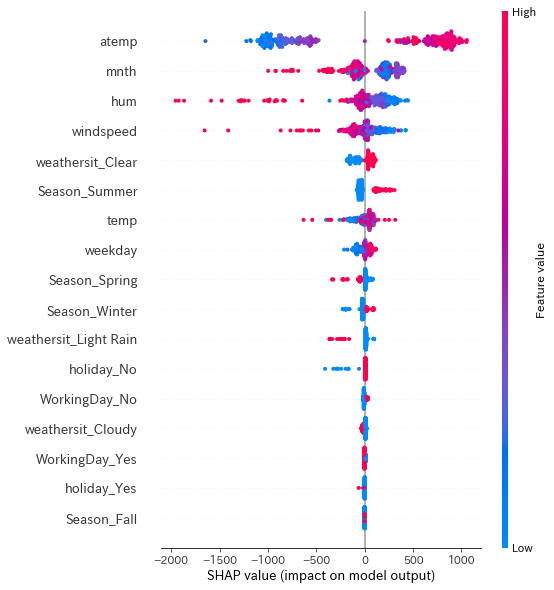

In [67]:
# 各特徴量の正負への影響
# 横軸: shap値, 縦軸: 説明変数の貢献度の高さ
shap.summary_plot(shap_values, features=df_2011_feature.values, feature_names=df_2011_feature.columns)